# Python自动爬虫抓取《三生三世十里桃花》

也许您看了《三生三世十里桃花》，表情是**的，内心是崩溃的，心情是想哭的。如果这时你打开了豆瓣刷起了影评，看到数万多条的短评，会否有想深入了解众豆友对于《三生三世十里桃花》的普遍想法？那么换不赶快将您的将魔爪伸向了本学期让您痛苦的python语言，一门您多次想从入门就直接放弃的语言！！！

In [1]:
from IPython.display import Image

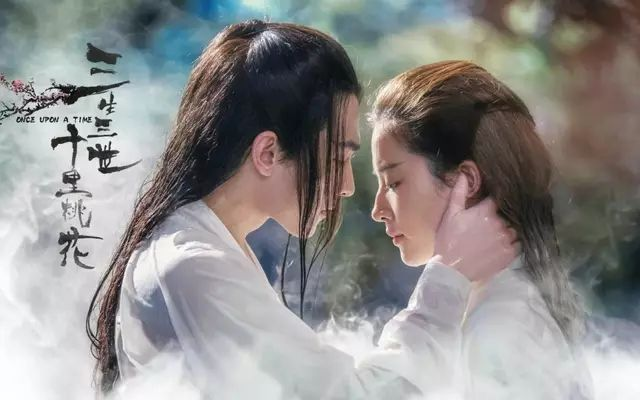

In [2]:
Image(filename="images/33100.jpg")

## 1.准备工作

python是一门相对于其他语言来说肥肠自由的语言，从它只能用空白符作为强制缩进符就能够感受到它与众不同，爱用不用的独特气质，像这样一位潇洒任性的公子自然免不得要提前做一些准备才能驾驭。

在开始使用python前你需要：


    了解编程方法(曾经学过任何一门计算机语言即可)

    了解python2.x与3.x的区别，根据寄几的需求确定所使用的版本(有没有了解)

    确定版本后，了解对应版本的python语法(是否入门到放弃了)

    在电脑上安装python(想去抱程序员小哥哥的大腿了？)

由于想要得到的是豆瓣的内容，所以选择了抓取豆瓣电影Top250的爬虫实例作为参考，具体内容见：抓取豆瓣电影Top250，这里使用的软件版本是python3。

## 2.分析爬虫原理

对爬虫可简单理解成是机器语言对用户操作的模拟，通过程序快速处理并实现对于用户来说重复费时的工作。

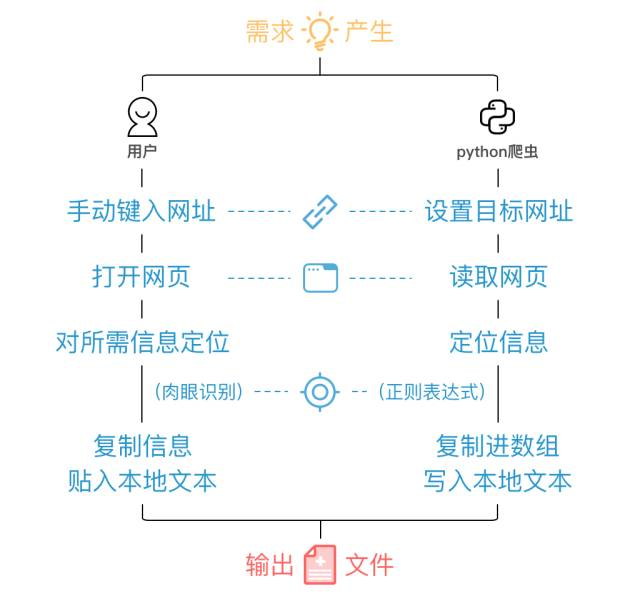

In [11]:
Image(filename="images/pachong.jpg")

以《三生三世十里桃花》的短评为例，首先键入豆瓣短评的网址https://movie.douban.com/subject/25823277/comments?status=P，载入网页后，在用户名和评分下方(定位信息)，即可看到用户的短评，8w条短评，我们就要不停的点击下一页来查看，这无疑是既重复，又费时的事情。

而使用python爬虫，就只需要几分钟的时间就可以搞定啦 (要是自己独立完成这个程序，会折腾了几天？)

## 3.分析url

可能有人会说，我平时都不是这么看短评的，我是先进主页→搜索三生三世→再点影片详情…(闭嘴)。所有在进入目标网页之前的操作，都可以以直接输入目标网址来代替。

《三生三世十里桃花》的热门短评首页网址结构：
movie.douban.com/subject/25823277/comments?status=P

《三生三世十里桃花》的热门短评第二页网址结构：
movie.douban.com/subject/25823277/comments?start=21&limit=20&sort=new_score&status=P

《三生三世十里桃花》的热门短评第三页网址结构：
movie.douban.com/subject/25823277/comments?start=44&limit=20&sort=new_score&status=P

……往后翻页网址中有变化的只有start=后面的数字

可以看出，热门短评只有首页与其他页的结构不同，于是我尝试了将第二页start=后面的数字改为0，即网址为：
movie.douban.com/subject/25823277/comments？

start=0&limit=20&sort=new_score&status=P
得到了与短评首页相同的网页。

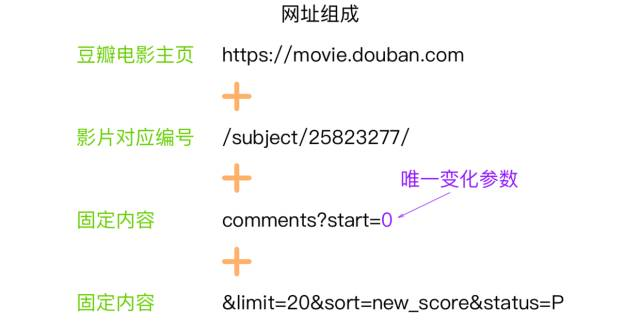

In [3]:
Image(filename="images/url.jpg")

movie.douban.com是豆瓣电影的主页。

/subject/25823277/是影片对应的编号，如果想要看其他电影的短评，在此处将编号改为其他电影的即可。

comments是与短评中好友短评对应，在选择好友短评时显示为follows_comments。

limit代表每页仅显示20个短评内容，sort=new_score代表显示类型是按热门短评排序，按最新短评排序时sort=time，但此时的start后面的数字是乱序的。

而唯一变化的是start=后的参数，这个参数并非如像每页20条短评内容一般，按照每20一次增加，在翻了几页之后，发现除了递增数字差＞20以外，没有其他明显规律，又因为在按最新短评排序是，start值为乱序，推理出start值对应的可能是评价过电影的用户，包括写短评以及只评星级未写评价内容的用户，排序方式是按热门程度依次排序(我猜的)。

由于不清楚真实的start递增规律，于是依旧采用了start+=20这种方法来实现翻页，这种方法的弊端是由于与实际翻页得到数字错位较大而在页面出现重复的短评内容，这个会在输出结果中进行修复。(思考：是否有其它优化方法)

## 4.分析网页

设置好目标网址之后，就可以打开目标网页了，首先来看网页内容，我们所需要的信息就是红框内的内容。

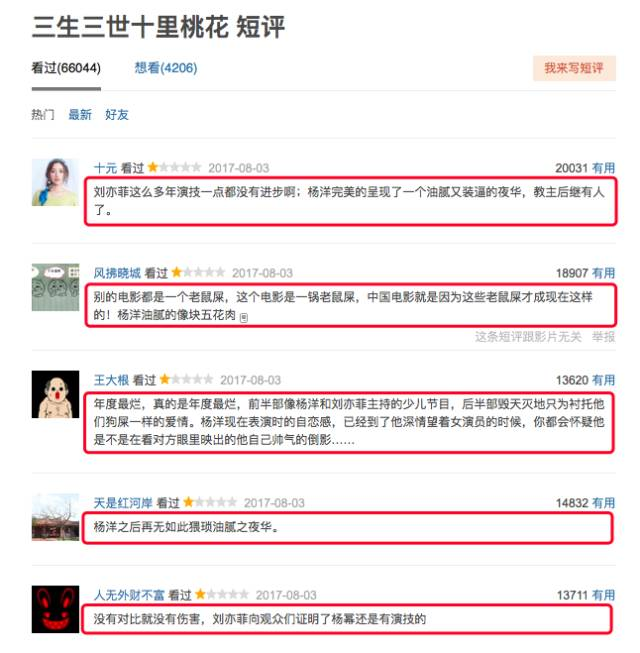

In [14]:
Image(filename="images/page.jpg")

在浏览器下打开网页，并右键选择“显示网页源代码”，找到与短评内容对应的代码块。（注意：更专业是按F12键，研究网页结构）

这里需要引入正则表达式。


根据代码编写正则表达式：

    <div.*?class="comment-item".*?>.*?'<p.*?class="">(.*?)</p>


其中.*?是正则表达式中的懒惰匹配，(.*?)是捕获组，即将这个位置匹配到的数据缓存下来，也就是我们需要找的短评内容。

## 5.构建代码

In [48]:
import urllib
import urllib.request
import re
import sys

In [51]:
class MovieComment:
    def __init__(self):
        self.start = 0    #爬虫起始位置
        self.param = '&filter=&type='
        #User-Agent是用户代理，用于使服务器识别用户所使用的操作系统及版本、浏览器类型等，可以认为是爬虫程序的伪装。
        self.headers = {'Cookie':'ll="108296"; bid=d91AV5yoQIo; _pk_ref.100001.8cb4=%5B%22%22%2C%22%22%2C1556014237%2C%22https%3A%2F%2Fwww.baidu.com%2Flink%3Furl%3DJVv-igf5dUTLOZiAvfJl7UWZQp2RRYQtEP9ZGJ2gU5m%26wd%3D%26eqid%3Df257709600035bbe000000045cbee495%22%5D; _pk_id.100001.8cb4=f047c308df85125a.1546075649.6.1556015636.1556007935.; __utma=30149280.103277351.1546075653.1556007939.1556014243.6; __utmz=30149280.1556014243.6.5.utmcsr=baidu|utmccn=(organic)|utmcmd=organic; __utmv=30149280.7814; __yadk_uid=ro4NUC5K65lPmeXecoe2XU73KoIjCvzE; push_noty_num=0; push_doumail_num=0; __utmc=30149280; _vwo_uuid_v2=D9DB01B26E87746B556FE78554B0BE4A6|d2a6eb2231401404e15af361e3cfdae9; _pk_ses.100001.8cb4=*; __utmb=30149280.9.10.1556014243; douban-profile-remind=1; __utmt=1; dbcl2="78149918:TVVznPa2lKE"','User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36'}
        self.commentList = []
        self.filePath = 'data/comment.txt'
    
    def getPage(self):
        try:
            URL = 'https://movie.douban.com/subject/25823277/comments?start=' + str(self.start)
            request = urllib.request.Request(url = URL, headers = self.headers)
            response = urllib.request.urlopen(request)
            page = response.read().decode('utf-8')
            pageNum = (self.start + 20)/20
            print('正在抓取第' + str(pageNum) + '页数据...' )
            self.start += 20
            return page
        except (urllib.request.URLError,Exception) as e:
            if hasattr(e, 'reason'):
                print('抓取失败，具体原因：', e.reason)
    
    def getMovie(self):
        pattern = re.compile(u'<div.*?class="avatar">.*?'
                             + u'<a.*?title="(.*?)".*?href=".*?">.*?</a>.*?'
                             + u'<p.*?class="">(.*?)</p>',re.S)  #正则表达式
        while self.start <= 10000:  #爬虫结束位置
            page = self.getPage()
            comments = re.findall(pattern, page)
            for comment in comments:
                self.commentList.append([comment[0], comment[1].strip()]) #将捕获组数据写入评论List中
    
    def writeTxt(self):
        fileComment = open(self.filePath, 'w',encoding='utf-8')
        try:
            for comment in self.commentList:
                fileComment.write( comment[1] + '\r\n\r\n') #输出评论List数据
            print('文件写入成功...')
        finally:
            fileComment.close()
    
    def run(self):
        print('正在从《三生三世十里桃花》电影短评中抓取数据...')
        self.getMovie()
        self.writeTxt()
        print('抓取完毕...')


In [52]:
DouBanSpider = MovieComment()
DouBanSpider.run()

正在从《三生三世十里桃花》电影短评中抓取数据...
正在抓取第1.0页数据...
正在抓取第2.0页数据...
正在抓取第3.0页数据...
正在抓取第4.0页数据...
正在抓取第5.0页数据...
正在抓取第6.0页数据...
正在抓取第7.0页数据...
正在抓取第8.0页数据...
正在抓取第9.0页数据...
正在抓取第10.0页数据...
正在抓取第11.0页数据...
正在抓取第12.0页数据...
正在抓取第13.0页数据...
正在抓取第14.0页数据...
正在抓取第15.0页数据...
正在抓取第16.0页数据...
正在抓取第17.0页数据...
正在抓取第18.0页数据...
正在抓取第19.0页数据...
正在抓取第20.0页数据...
正在抓取第21.0页数据...
正在抓取第22.0页数据...
正在抓取第23.0页数据...
正在抓取第24.0页数据...
正在抓取第25.0页数据...
正在抓取第26.0页数据...
正在抓取第27.0页数据...
正在抓取第28.0页数据...
正在抓取第29.0页数据...
正在抓取第30.0页数据...
正在抓取第31.0页数据...
正在抓取第32.0页数据...
正在抓取第33.0页数据...
正在抓取第34.0页数据...
正在抓取第35.0页数据...
正在抓取第36.0页数据...
正在抓取第37.0页数据...
正在抓取第38.0页数据...
正在抓取第39.0页数据...
正在抓取第40.0页数据...
正在抓取第41.0页数据...
正在抓取第42.0页数据...
正在抓取第43.0页数据...
正在抓取第44.0页数据...
正在抓取第45.0页数据...
正在抓取第46.0页数据...
正在抓取第47.0页数据...
正在抓取第48.0页数据...
正在抓取第49.0页数据...
正在抓取第50.0页数据...
正在抓取第51.0页数据...
正在抓取第52.0页数据...
正在抓取第53.0页数据...
正在抓取第54.0页数据...
正在抓取第55.0页数据...
正在抓取第56.0页数据...
正在抓取第57.0页数据...
正在抓取第58.0页数据...
正在抓取第59.0页数据...
正在抓取第60.0页数据...
正在抓取第61.0页数据...
正在抓取第62

TypeError: expected string or bytes-like object

##  6.后续问题¶

爬虫调试成功后，该开始野心勃勃的8w短评爬取征途了吧，将start结束值设置成了80000，准备代码跑起来，爬虫爬起来，马上去做吧……

### 模拟登陆
见2.1中相关内容

##  练习    lxml+xpath

In [16]:
import requests
from lxml import etree

In [21]:
user_agent="Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:63.0) Gecko/20100101 Firefox/63.0"
headers={'Cookie':'ll="108296"; bid=d91AV5yoQIo; __utma=30149280.103277351.1546075653.1555995677.1556007939.5; __utmz=30149280.1556007939.5.4.utmcsr=baidu|utmccn=(organic)|utmcmd=organic; __utmv=30149280.7176; push_noty_num=0; push_doumail_num=0; login_start_time=1556007982129; __utmc=30149280; _vwo_uuid_v2=D9DB01B26E87746B556FE78554B0BE4A6|d2a6eb2231401404e15af361e3cfdae9; __utmb=30149280.1.10.1556007939; __utmt=1',"User-Agent":user_agent}  #请求头,headers是一个字典类型

In [53]:
html = requests.get('https://movie.douban.com/subject/25823277/comments?status=P',headers=headers).content
print(html)

b'\xe6\xa3\x80\xe6\xb5\x8b\xe5\x88\xb0\xe6\x9c\x89\xe5\xbc\x82\xe5\xb8\xb8\xe8\xaf\xb7\xe6\xb1\x82\xe4\xbb\x8e\xe4\xbd\xa0\xe7\x9a\x84 IP \xe5\x8f\x91\xe5\x87\xba\xef\xbc\x8c\xe8\xaf\xb7 <a href="https://accounts.douban.com/passport/login?redir=https%3A%2F%2Fmovie.douban.com%2Fsubject%2F25823277%2Fcomments%3Fstatus%3DP">\xe7\x99\xbb\xe5\xbd\x95</a> \xe4\xbd\xbf\xe7\x94\xa8\xe8\xb1\x86\xe7\x93\xa3\xe3\x80\x82\n'


In [54]:
selector = etree.HTML(html)

In [55]:
print(selector)

<Element html at 0x1123cfe48>


In [56]:
divs = selector.xpath("/html/body/div[3]/div[1]/div/div[1]/div[4]/div")  #copy xpath

In [57]:
print(divs)

[]


In [58]:
/html/body/div[3]/div[1]/div/div[1]/div[4]/div[1]/div[2]/p/span

NameError: name 'body' is not defined

In [42]:
print(divs[0])

IndexError: list index out of range

In [ ]:
selector=e

In [28]:
for div in divs:
    txt = div.xpath("div[2]/p/span/text()")
    print(txt,'\n'*2)